In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os
import matplotlib.animation as animation
import numpy as np

In [3]:
if not os.path.exists("plots"):
    os.mkdir("plots")

if not os.path.exists("plots/default"):
    os.mkdir("plots/default")

if not os.path.exists("plots/20"):
    os.mkdir("plots/20")

if not os.path.exists("plots/100"):
    os.mkdir("plots/100")

In [4]:
# log_file = "2023-09-10_20-58-50"
# log_file = "2023-09-11_00-58-16"

log_files = {
    "default": "2023-09-10_20-58-50",
    "20": "2023-09-11_00-58-16",
    "100": "2023-09-10_23-38-25",
    "20_alt": "2023-09-12_00-18-45",
}

sim_type = "default"
# sim_type = "20"
# sim_type = "100"
# sim_type = "20_alt"

log_file = log_files[sim_type]

agp_df = pd.read_csv(f"logs/{log_file}/agp_data.csv", index_col=0)
cars_df = pd.read_csv(f"logs/{log_file}/cars_data.csv", index_col=0)
exits_df = pd.read_csv(f"logs/{log_file}/exits_data.csv", index_col=0)
crashes_df = pd.read_csv(f"logs/{log_file}/crashes_data.csv", index_col=0)

In [5]:
cut_frame = 1000 if sim_type == "default" else 100000
cars_cut_frame = 1000


In [6]:
agp_df.head()

,frame,current_car_count,historic_car_count,current_crash_count,historic_crash_count,avg_v,avg_a,avg_t_d
0,0.0,2.0,2.0,0.0,0.0,18.232688,2.562109,0.0
1,1.0,2.0,2.0,0.0,0.0,20.308217,2.223934,0.0
2,2.0,2.0,2.0,0.0,0.0,21.545261,2.156299,0.0
3,3.0,2.0,2.0,0.0,0.0,22.662522,2.127312,0.0
4,4.0,3.0,3.0,0.0,0.0,23.739855,2.111209,0.0


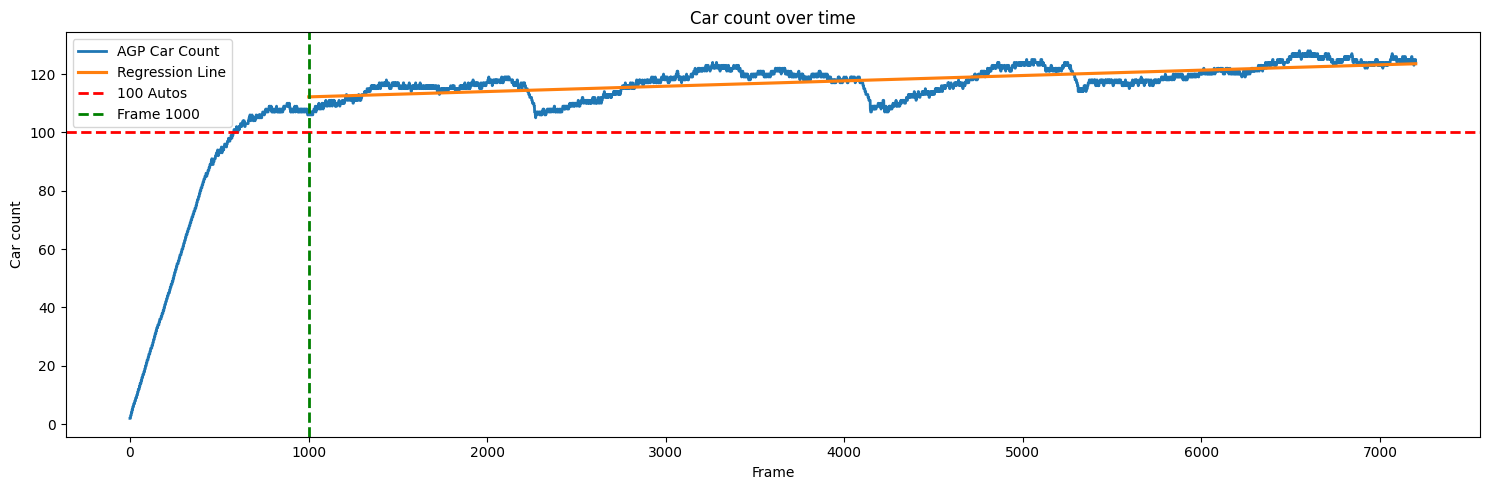

In [7]:
fig, ax = plt.subplots(figsize=(15, 5))

agp_df['current_car_count'].plot(ax=ax, label='AGP Car Count', linewidth=2)

# Regression Line over AGP Car Count
sns.regplot(x='frame', y='current_car_count', data=agp_df[agp_df["frame"] > cars_cut_frame], ax=ax, scatter=False, label='Regression Line')

ax.axhline(100, color='r', linestyle='--', label='100 Autos', linewidth=2)

ax.axvline(cars_cut_frame, color='g', linestyle='--', label=f"Frame {cars_cut_frame}", linewidth=2)

ax.set_xlabel('Frame')
ax.set_ylabel('Car count')
ax.set_title('Car count over time')

plt.legend()

fig.tight_layout()

# Transparent background
fig.patch.set_alpha(0)

plt.savefig(f"plots/{sim_type}/car_count.png", transparent=True)

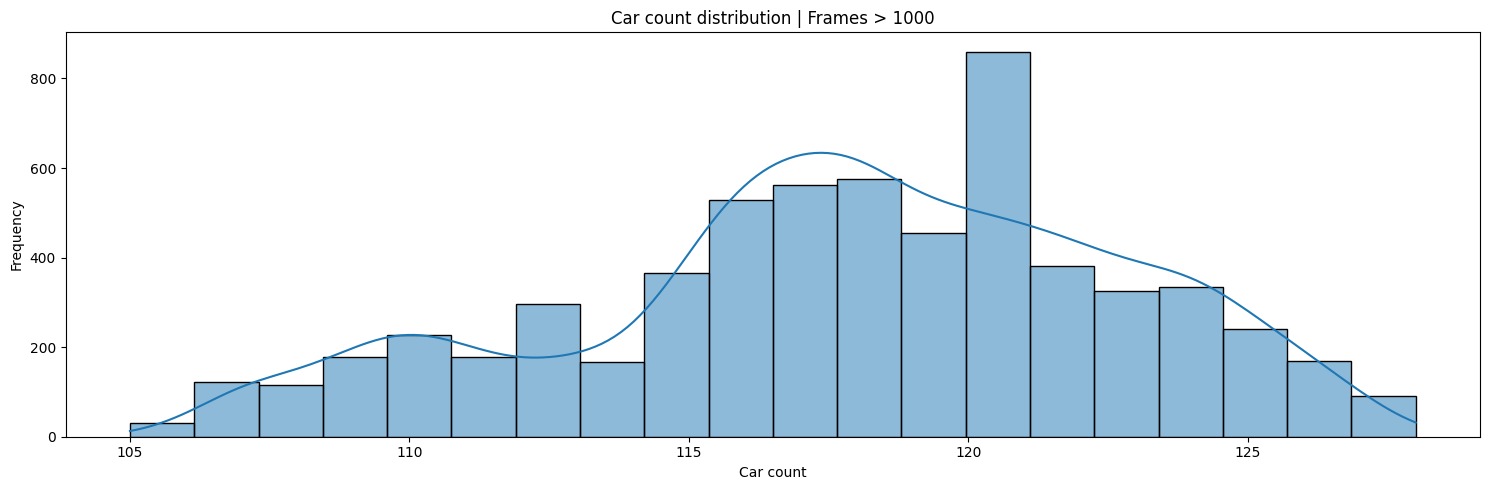

In [8]:
# Current car count distribution

fig, ax = plt.subplots(figsize=(15, 5))

sns.histplot(data=agp_df[agp_df["frame"] > cars_cut_frame], x="current_car_count", bins=20, kde=True, ax=ax)

ax.set_xlabel('Car count')
ax.set_ylabel('Frequency')

ax.set_title(f"Car count distribution | Frames > {cut_frame}")

fig.tight_layout()

# Transparent background
fig.patch.set_alpha(0)

plt.savefig(f"plots/{sim_type}/car_count_distribution.png", transparent=True)

In [9]:
cars_df.sample(10)

,frame,car_id,car_x,car_v,car_a,car_t_d,f_car_id,b_car_id
671967,6099.0,504452.0,4061.087033,21.520002,1.542751,301.0,80810.0,57765.0
506474,4717.0,868112.0,2588.596846,19.868200,1.903716,197.0,280709.0,433675.0
630347,5751.0,703688.0,241.906854,6.628826,2.199616,25.0,186652.0,143441.0
102359,1225.0,687907.0,6162.961319,26.348062,-3.556240,358.0,357810.0,665627.0
603895,5525.0,988132.0,985.634970,13.258260,-3.633491,88.0,763609.0,382759.0
655394,5961.0,548342.0,12168.811042,23.165320,1.711920,633.0,188907.0,794781.0
475287,4447.0,197270.0,7059.247424,21.668250,2.729746,461.0,468046.0,103132.0
549115,5066.0,627566.0,7876.515120,22.371728,-3.672983,468.0,335101.0,173849.0
718887,6484.0,392972.0,1876.408519,16.292063,-3.465845,165.0,702343.0,574469.0
774476,6927.0,540069.0,4857.604786,20.719717,-3.437763,313.0,195822.0,734879.0


In [10]:
cars_df.groupby('frame')['car_v'].mean().mean() * 3.6

72.1647370842904

In [11]:
cars_df[cars_df["frame"] > cut_frame].groupby('frame')['car_v'].mean()

frame
1001.0    21.114123
1002.0    21.106011
1003.0    21.132442
1004.0    21.080740
1005.0    21.036939
            ...    
7196.0    18.540397
7197.0    18.488104
7198.0    18.451075
7199.0    18.479847
7200.0    18.469764
Name: car_v, Length: 6200, dtype: float64

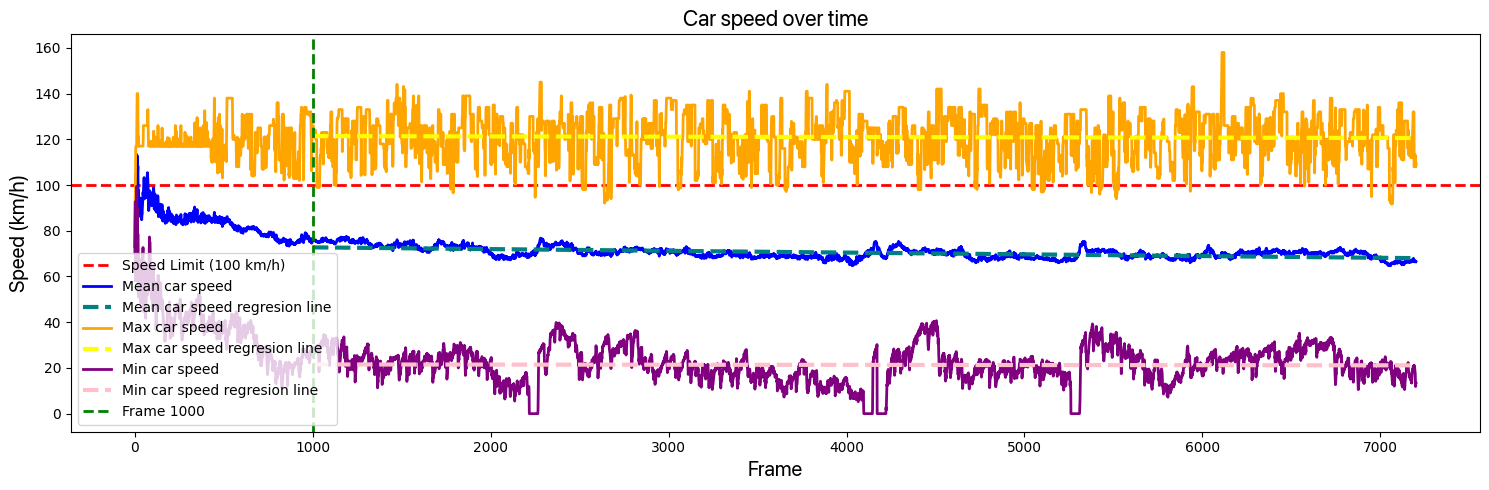

In [12]:
fig, ax = plt.subplots(figsize=(15, 5))

# Plot line at y=100
ax.axhline(100, color='r', linestyle='--', label='Speed Limit (100 km/h)', linewidth=2)

cars_df.groupby('frame')['car_v'].mean().apply(lambda x: x*3.6).plot(ax=ax, label='Mean car speed', linewidth=2, color="b")

# Regresion Line over mean car speed
sns.regplot(x=(cars_df[cars_df["frame"] > cars_cut_frame]).groupby('frame')['car_v'].mean().index, y=(cars_df[cars_df["frame"] > cars_cut_frame]).groupby('frame')['car_v'].mean().apply(lambda x: x*3.6), ax=ax, scatter=False, color="teal", label="Mean car speed regresion line", line_kws={'linewidth': 3, 'linestyle': '--'})

# Plot max car_v for each frame
cars_df.groupby('frame')['car_v'].max().apply(lambda x: x*3.6).plot(ax=ax, label='Max car speed', linewidth=2, color="orange")

sns.regplot(x=(cars_df[cars_df["frame"] > cars_cut_frame]).groupby('frame')['car_v'].max().index, y=(cars_df[cars_df["frame"] > cars_cut_frame]).groupby('frame')['car_v'].max().apply(lambda x: x*3.6), ax=ax, scatter=False, color="yellow", label="Max car speed regresion line", line_kws={'linewidth': 3, 'linestyle': '--'})

# Plot min car_v for each frame
cars_df.groupby('frame')['car_v'].min().apply(lambda x: x*3.6).plot(ax=ax, label='Min car speed', linewidth=2, color="purple")

sns.regplot(x=(cars_df[cars_df["frame"] > cars_cut_frame]).groupby('frame')['car_v'].min().index, y=(cars_df[cars_df["frame"] > cars_cut_frame]).groupby('frame')['car_v'].min().apply(lambda x: x*3.6), ax=ax, scatter=False, color="pink", label="Min car speed regresion line", line_kws={'linewidth': 3, 'linestyle': '--'})

# ax.set_xlim(cut_frame, ax.get_xlim()[1])

ax.set_xlabel('Frame', font="SF Pro Display", fontsize=15)
ax.set_ylabel('Speed (km/h)', font="SF Pro Display", fontsize=15)

ax.axvline(cars_cut_frame, color='g', linestyle='--', label=f"Frame {cars_cut_frame}", linewidth=2)

if sim_type == "100":
    ax.set_ylim(95, 101)

ax.legend()

ax.set_title('Car speed over time', font="SF Pro Display", fontsize=16)

fig.tight_layout()

# Transparent background
fig.patch.set_alpha(0)

fig.savefig(f"plots/{sim_type}/car_speed_over_time.png", dpi=300, transparent=True)

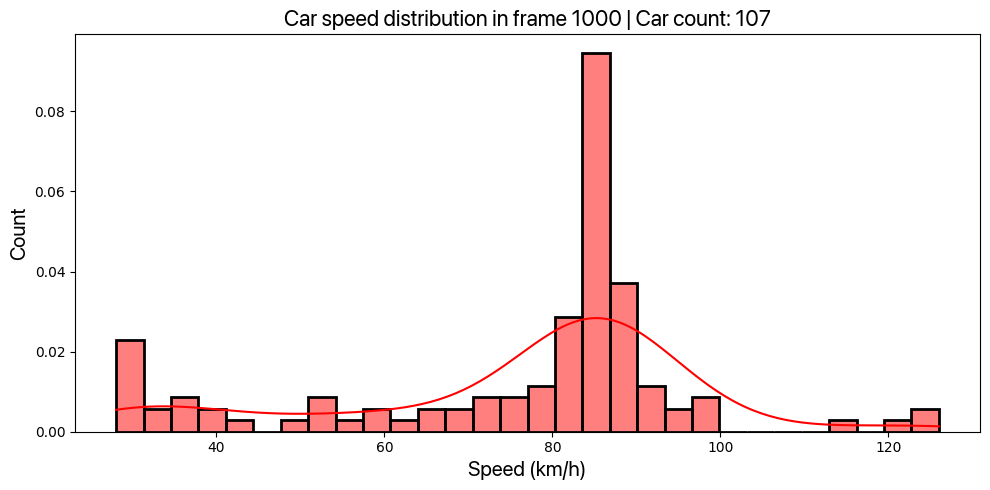

In [13]:
# Plot speed distribution in a given frame

frame = cut_frame if len(agp_df[agp_df['frame'] == cut_frame]) > 0 else agp_df['frame'].mean()

fig, ax = plt.subplots(figsize=(10, 5))

car_count = int(agp_df[agp_df['frame'] == frame]['current_car_count'].values[0])

sns.histplot(cars_df[cars_df['frame'] == frame]['car_v'].apply(lambda x: x*3.6), ax=ax, bins=30, kde=True, stat='density', color='red', linewidth=2)

ax.set_xlabel('Speed (km/h)', font="SF Pro Display", fontsize=15)
ax.set_ylabel('Count', font="SF Pro Display", fontsize=15)

ax.set_title(f"Car speed distribution in frame {frame} | Car count: {car_count}", font="SF Pro Display", fontsize=16)

fig.tight_layout()

# Transparent background

fig.patch.set_alpha(0)

fig.savefig(f"plots/{sim_type}/car_speed_distribution.png", dpi=300, transparent=True)

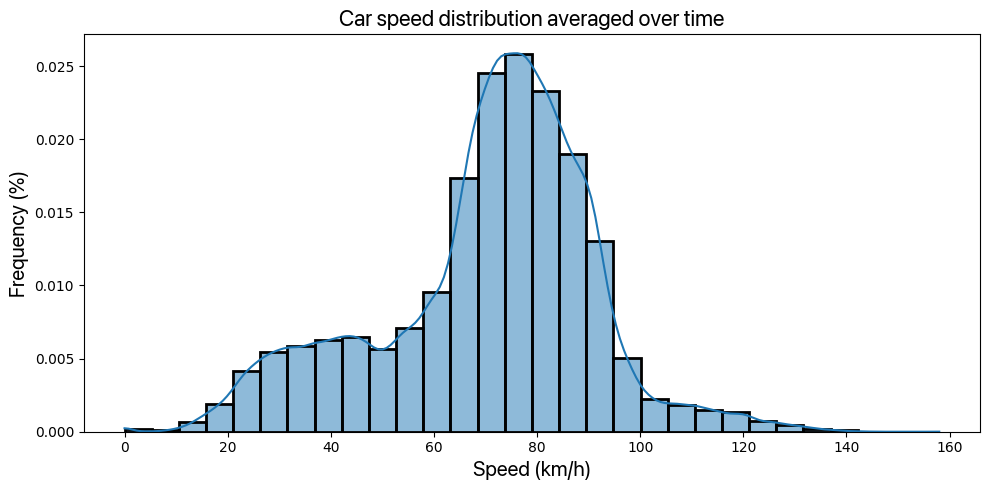

In [14]:
# Plot speed distributions averaged over time

fig, ax = plt.subplots(figsize=(10, 5))

sns.histplot(cars_df[cars_df["frame"] > cars_cut_frame]['car_v'].apply(lambda x: x*3.6), ax=ax, bins=30, kde=True, stat='density', linewidth=2)


ax.set_xlabel('Speed (km/h)', font="SF Pro Display", fontsize=15)
ax.set_ylabel('Frequency (%)', font="SF Pro Display", fontsize=15)

ax.set_title(f'Car speed distribution averaged over time', font="SF Pro Display", fontsize=16)

fig.tight_layout()

# Transparent background

fig.patch.set_alpha(0)

fig.savefig(f"plots/{sim_type}/car_speed_distribution_averaged.png", dpi=300, transparent=True)

In [15]:
""" # Animate car speed distribution over time

fig, ax = plt.subplots(figsize=(10, 5))

def animate(i):
    ax.clear()

    car_count = int(agp_df[agp_df['frame'] == i]['current_car_count'].values[0])

    sns.histplot(cars_df[cars_df['frame'] == i]['car_v'].apply(lambda x: x*3.6), ax=ax, bins=30, kde=True, stat='density', color='red', linewidth=2)
    ax.set_xlabel('Speed (km/h)', font="SF Pro Display", fontsize=15)
    ax.set_ylabel('Count', font="SF Pro Display", fontsize=15)
    ax.set_title(f'Car speed distribution in frame {i} | Car count: {car_count}', font="SF Pro Display", fontsize=16)
    fig.tight_layout()
    fig.patch.set_alpha(0)

ani = animation.FuncAnimation(fig, animate, frames=range(0, len(cars_df['frame'].unique()), 1), interval=cut_frame)

ani.save('plots/car_speed_distribution.gif', writer='imagemagick', fps=10) """

' # Animate car speed distribution over time\n\nfig, ax = plt.subplots(figsize=(10, 5))\n\ndef animate(i):\n    ax.clear()\n\n    car_count = int(agp_df[agp_df[\'frame\'] == i][\'current_car_count\'].values[0])\n\n    sns.histplot(cars_df[cars_df[\'frame\'] == i][\'car_v\'].apply(lambda x: x*3.6), ax=ax, bins=30, kde=True, stat=\'density\', color=\'red\', linewidth=2)\n    ax.set_xlabel(\'Speed (km/h)\', font="SF Pro Display", fontsize=15)\n    ax.set_ylabel(\'Count\', font="SF Pro Display", fontsize=15)\n    ax.set_title(f\'Car speed distribution in frame {i} | Car count: {car_count}\', font="SF Pro Display", fontsize=16)\n    fig.tight_layout()\n    fig.patch.set_alpha(0)\n\nani = animation.FuncAnimation(fig, animate, frames=range(0, len(cars_df[\'frame\'].unique()), 1), interval=cut_frame)\n\nani.save(\'plots/car_speed_distribution.gif\', writer=\'imagemagick\', fps=10) '

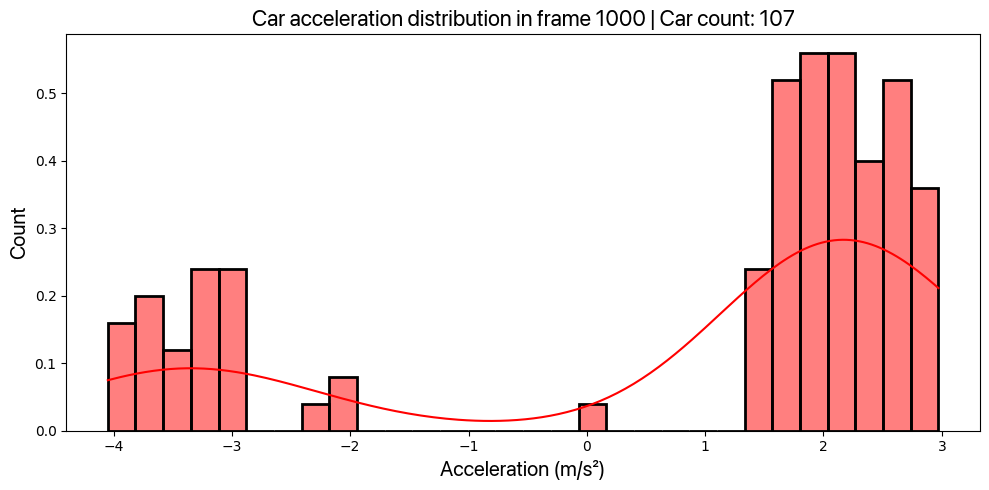

In [16]:
# Plot acceleration distribution in a given frame

frame = cut_frame if len(agp_df[agp_df['frame'] == cut_frame]) > 0 else agp_df['frame'].mean()

fig, ax = plt.subplots(figsize=(10, 5))

car_count = int(agp_df[agp_df['frame'] == frame]['current_car_count'].values[0])

sns.histplot(cars_df[cars_df['frame'] == frame]['car_a'], ax=ax, bins=30, kde=True, stat='density', color='red', linewidth=2)

ax.set_xlabel('Acceleration (m/s²)', font="SF Pro Display", fontsize=15)
ax.set_ylabel('Count', font="SF Pro Display", fontsize=15)

ax.set_title(f'Car acceleration distribution in frame {frame} | Car count: {car_count}', font="SF Pro Display", fontsize=16)

fig.tight_layout()

# Transparent background

fig.patch.set_alpha(0)

fig.savefig(f"plots/{sim_type}/car_acceleration_distribution.png", dpi=300, transparent=True)

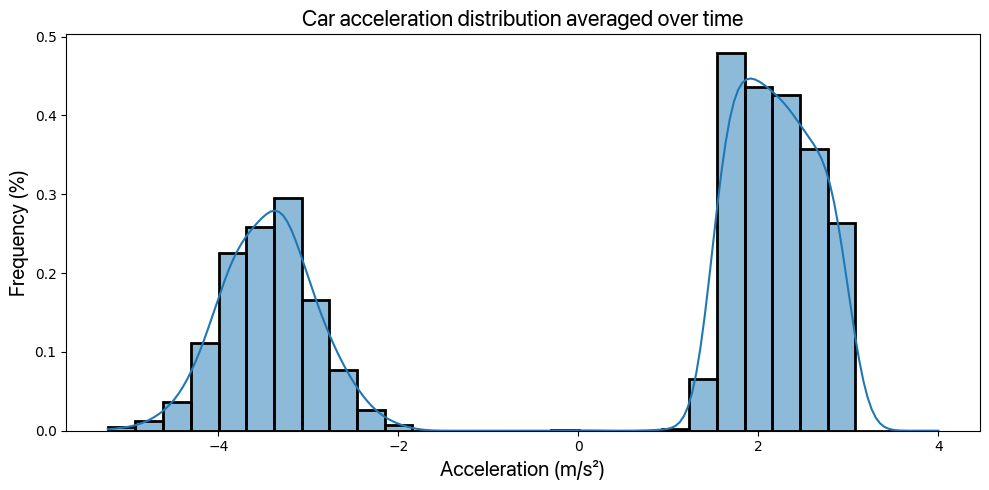

In [17]:
# Plot acceleration distributions averaged over time

fig, ax = plt.subplots(figsize=(10, 5))

sns.histplot(cars_df['car_a'], ax=ax, bins=30, kde=True, stat='density', linewidth=2)

ax.set_xlabel('Acceleration (m/s²)', font="SF Pro Display", fontsize=15)
ax.set_ylabel('Frequency (%)', font="SF Pro Display", fontsize=15)

ax.set_title(f'Car acceleration distribution averaged over time', font="SF Pro Display", fontsize=16)

fig.tight_layout()

# Transparent background

fig.patch.set_alpha(0)

fig.savefig(f"plots/{sim_type}/car_acceleration_distribution_averaged.png", dpi=300, transparent=True)

In [18]:
cars_df.head()

,frame,car_id,car_x,car_v,car_a,car_t_d,f_car_id,b_car_id
0,0.0,880432.0,0.000000,21.111111,2.000000,0.0,421909.0,-1.0
1,0.0,421909.0,118.207123,19.500932,2.562109,1.0,-1.0,880432.0
2,1.0,880432.0,21.881644,22.663219,1.547584,1.0,421909.0,-1.0
3,1.0,421909.0,138.976300,22.063041,2.562109,2.0,-1.0,880432.0
4,2.0,880432.0,45.310917,24.210803,1.547584,2.0,421909.0,-1.0


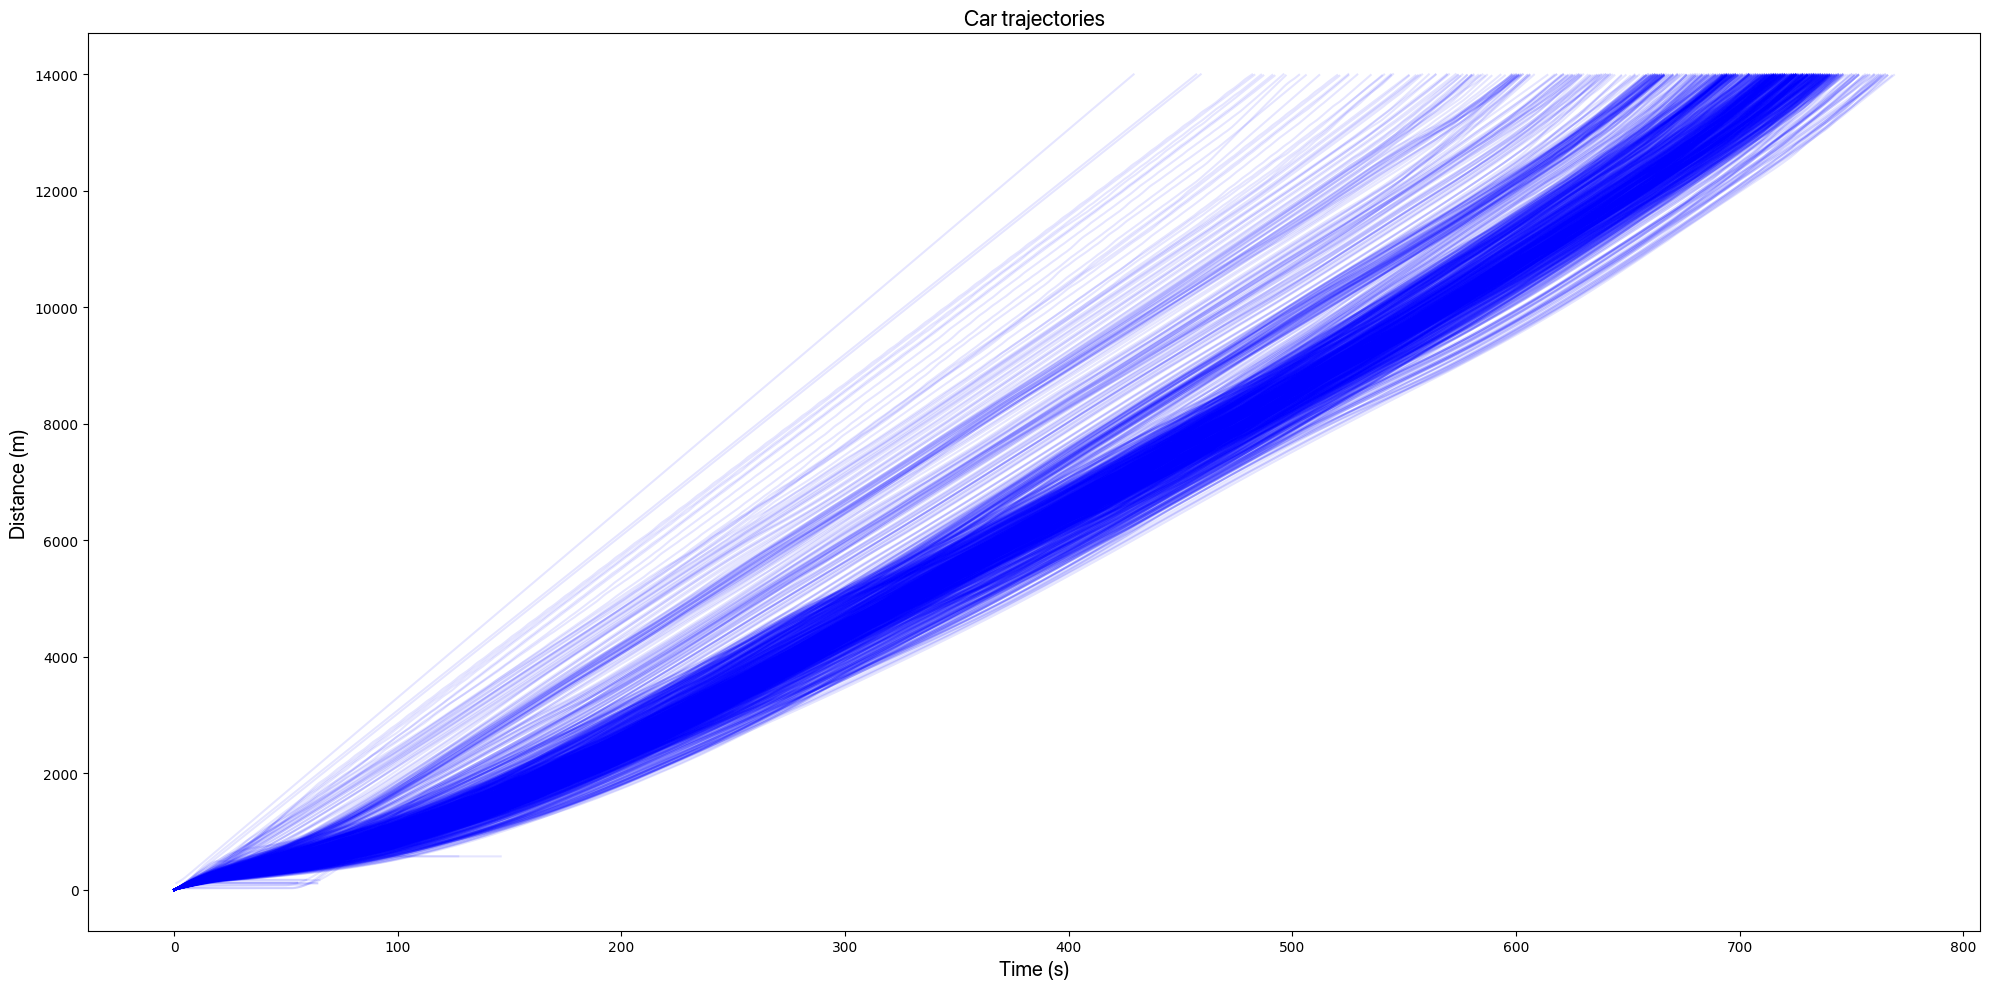

In [38]:
# Plot all car trajectories

fig, ax = plt.subplots(figsize=(20, 10))

#sns.scatterplot(data=cars_df, x='car_t_d', y='car_x', hue='car_id', ax=ax, s=10, color='blue')

cars_df.groupby('car_id').plot(x='car_t_d', y='car_x', ax=ax, legend=False, alpha=0.1, color='blue')

ax.set_xlabel('Time (s)', font="SF Pro Display", fontsize=15)
ax.set_ylabel('Distance (m)', font="SF Pro Display", fontsize=15)

ax.set_title(f'Car trajectories', font="SF Pro Display", fontsize=16)

fig.tight_layout()

# Transparent background
fig.patch.set_alpha(0)

fig.savefig(f"plots/{sim_type}/car_trajectories_relative.png", dpi=300, transparent=True)

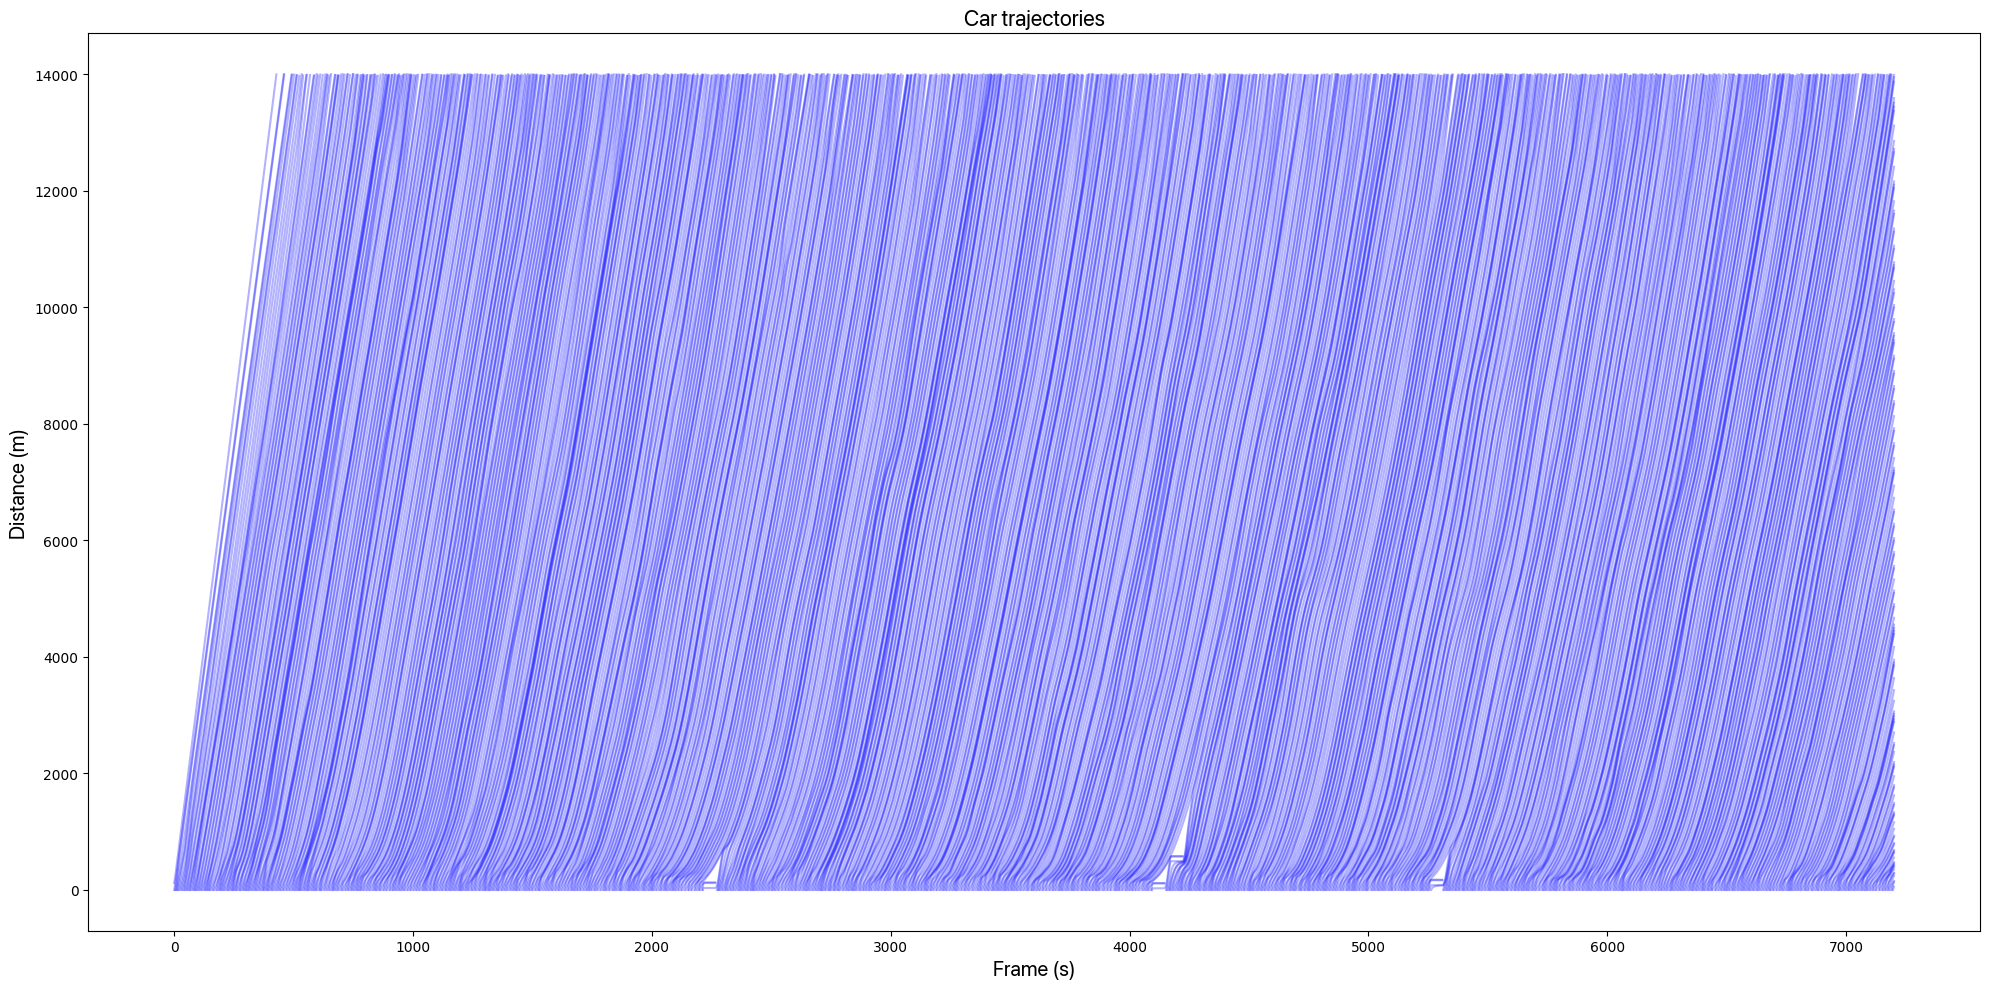

In [20]:
# Plot all car trajectories

fig, ax = plt.subplots(figsize=(20, 10))

#sns.scatterplot(data=cars_df, x='car_t_d', y='car_x', hue='car_id', ax=ax, s=10, color='blue')

cars_df.groupby('car_id').plot(x='frame', y='car_x', ax=ax, legend=False, alpha=0.3, color='blue')

ax.set_xlabel('Frame (s)', font="SF Pro Display", fontsize=15)
ax.set_ylabel('Distance (m)', font="SF Pro Display", fontsize=15)

ax.set_title(f'Car trajectories', font="SF Pro Display", fontsize=16)

fig.tight_layout()

# Transparent background
fig.patch.set_alpha(0)

fig.savefig(f"plots/{sim_type}/car_trajectories_absolute.png", dpi=300, transparent=True)

In [21]:
exits_df["subframe"] = exits_df["frame"].apply(lambda x: x%100)
exits_df["frame"] = exits_df["frame"].apply(lambda x: round(x/100, 0))
exits_df

,frame,car_id,avg_v,avg_a,t_d,subframe
0,429.0,421909.0,32.390066,2.562096,429.15,14.0
1,460.0,880432.0,30.492951,1.547594,459.13,12.0
2,462.0,891819.0,30.622929,0.066021,457.19,18.0
3,492.0,206901.0,28.956297,1.886518,483.49,48.0
4,495.0,806738.0,29.034110,0.114870,482.20,19.0
...,...,...,...,...,...,...
1085,7181.0,582792.0,18.945043,0.070717,738.99,98.0
1086,7183.0,852394.0,19.147609,0.022045,731.17,16.0
1087,7187.0,426132.0,19.146060,0.036576,731.24,23.0
1088,7190.0,142879.0,19.275591,0.054043,726.32,31.0


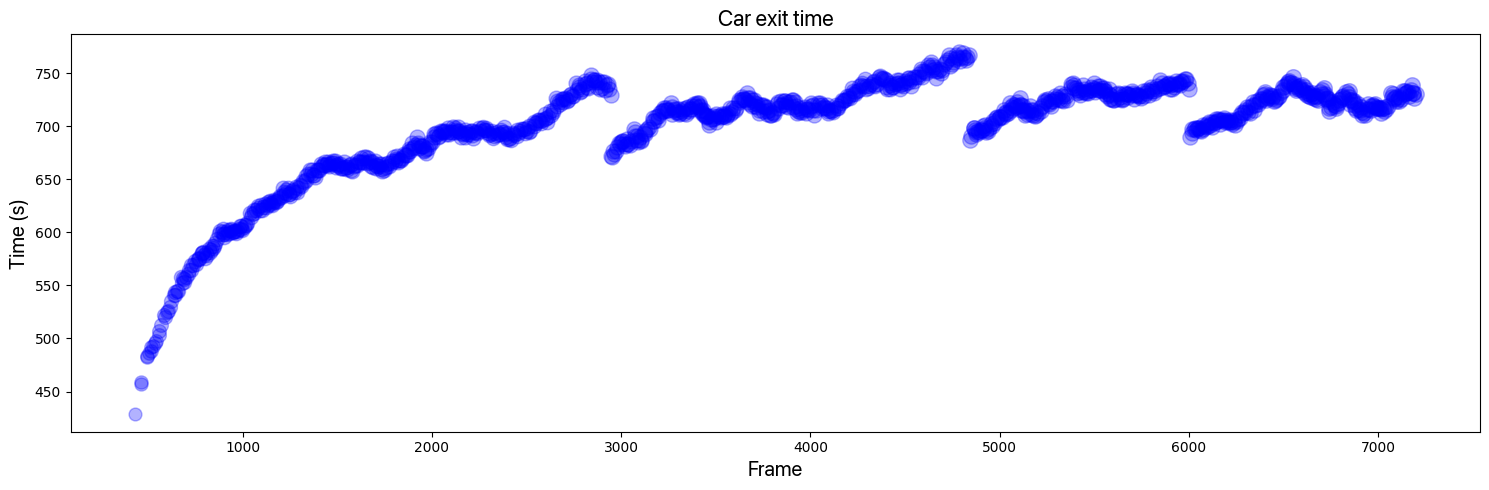

In [22]:
fig, ax = plt.subplots(figsize=(15, 5))

# Plot t_d vs car count for each frame, car_count is only in agp_df

exit_frames = exits_df['frame'].unique()

for i in range(len(exits_df)):
    
    frame = exits_df.iloc[i]['frame']
    t_d = exits_df.iloc[i]['t_d']

    if len(agp_df[agp_df['frame'] == frame]['current_car_count'].values) > 0:
        car_count = agp_df[agp_df['frame'] == frame]['current_car_count'].values[0]
        ax.scatter(frame, t_d, s=car_count, color='blue', alpha=0.3)

ax.set_xlabel('Frame', font="SF Pro Display", fontsize=15)
ax.set_ylabel('Time (s)', font="SF Pro Display", fontsize=15)

ax.set_title(f'Car exit time', font="SF Pro Display", fontsize=16)

fig.tight_layout()

# Transparent background
fig.patch.set_alpha(0)


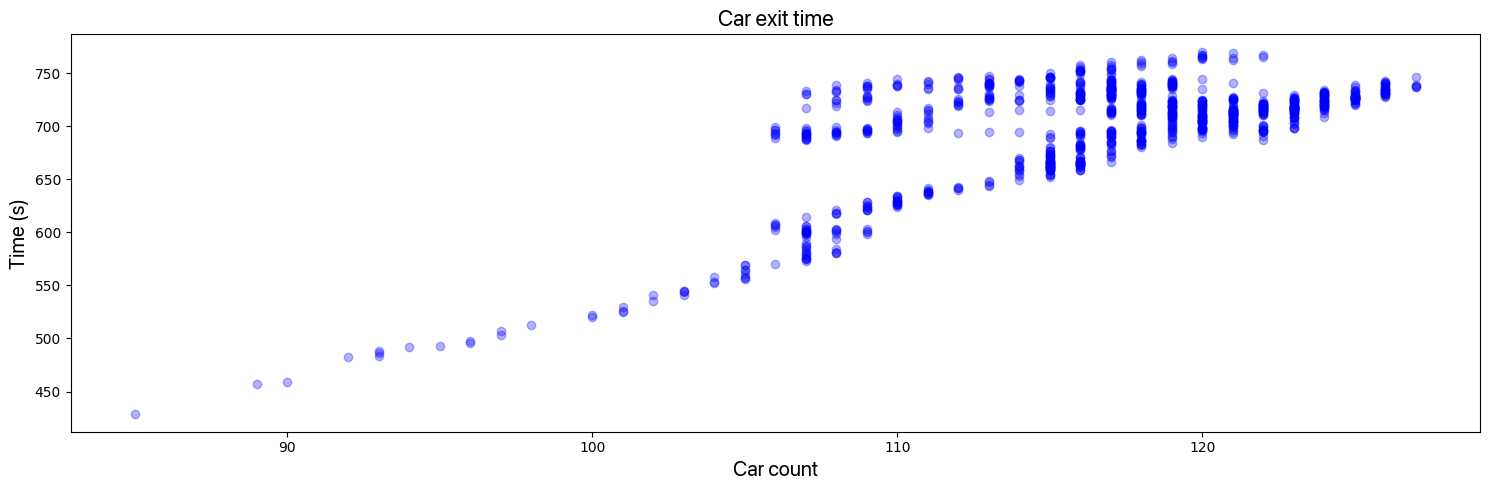

In [23]:
fig, ax = plt.subplots(figsize=(15, 5))

# Plot t_d vs car count for each frame, car_count is only in agp_df

exit_frames = exits_df['frame'].unique()

for i in range(len(exits_df)):
    frame = exits_df.iloc[i]['frame']
    t_d = exits_df.iloc[i]['t_d']

    if len(agp_df[agp_df['frame'] == frame]['current_car_count'].values) > 0:
        car_count = agp_df[agp_df['frame'] == frame]['current_car_count'].values[0]
        ax.scatter(car_count, t_d, color='blue', alpha=0.3)

ax.set_xlabel('Car count', font="SF Pro Display", fontsize=15)
ax.set_ylabel('Time (s)', font="SF Pro Display", fontsize=15)

ax.set_title(f'Car exit time', font="SF Pro Display", fontsize=16)

fig.tight_layout()

# Transparent background
fig.patch.set_alpha(0)


In [24]:
exits_df

,frame,car_id,avg_v,avg_a,t_d,subframe
0,429.0,421909.0,32.390066,2.562096,429.15,14.0
1,460.0,880432.0,30.492951,1.547594,459.13,12.0
2,462.0,891819.0,30.622929,0.066021,457.19,18.0
3,492.0,206901.0,28.956297,1.886518,483.49,48.0
4,495.0,806738.0,29.034110,0.114870,482.20,19.0
...,...,...,...,...,...,...
1085,7181.0,582792.0,18.945043,0.070717,738.99,98.0
1086,7183.0,852394.0,19.147609,0.022045,731.17,16.0
1087,7187.0,426132.0,19.146060,0.036576,731.24,23.0
1088,7190.0,142879.0,19.275591,0.054043,726.32,31.0


In [25]:
exits_df['frame'] - round(exits_df['t_d'])

0          0.0
1          1.0
2          5.0
3          9.0
4         13.0
         ...  
1085    6442.0
1086    6452.0
1087    6456.0
1088    6464.0
1089    6470.0
Length: 1090, dtype: float64

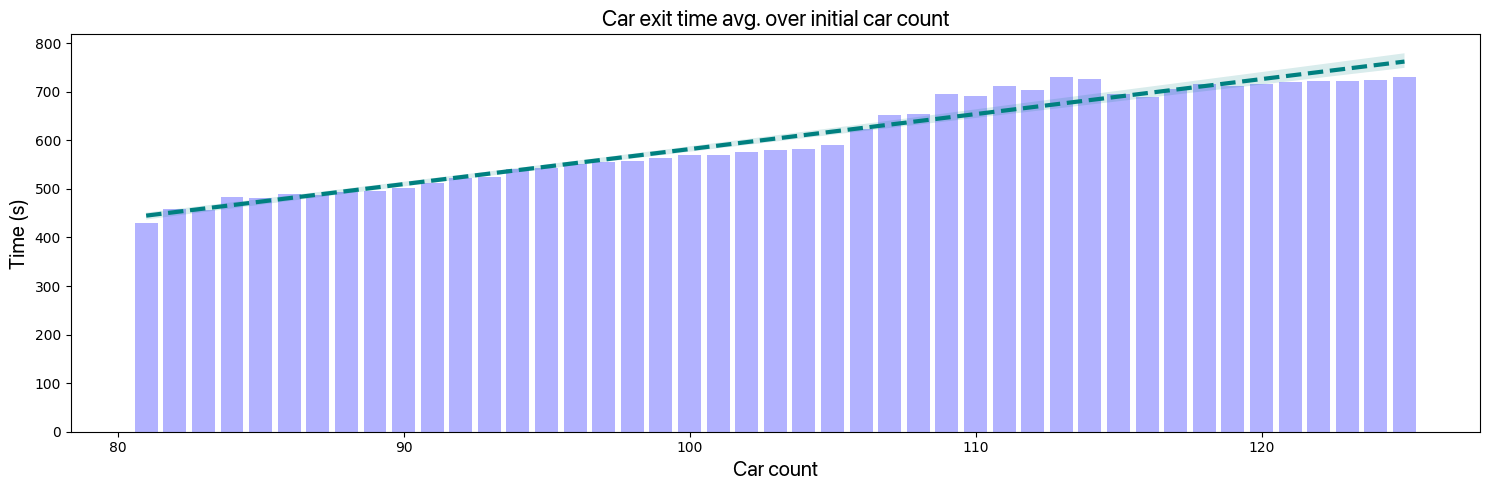

In [26]:
# Plot mean t_d for each car count for each frame, car_count is only in agp_df

fig, ax = plt.subplots(figsize=(15, 5))

exit_for_car_count = {}

exit_frames = exits_df['frame'].unique()[exits_df['frame'].unique() > cars_cut_frame]

for i in range(len(exits_df[exits_df['frame'].unique() > cars_cut_frame])):
    
    frame = round(exits_df[exits_df['frame'].unique() > cars_cut_frame].iloc[i]['frame'] - (exits_df[exits_df['frame'].unique() > cars_cut_frame].iloc[i]['t_d']))
    t_d = exits_df.iloc[i]['t_d']

    if len(agp_df[agp_df['frame'] == frame]['current_car_count'].values) > 0:
        car_count = agp_df[agp_df['frame'] == frame]['current_car_count'].values[0]
        
        if car_count not in exit_for_car_count:
            exit_for_car_count[car_count] = []
        
        exit_for_car_count[car_count].append(t_d)

for car_count in exit_for_car_count:
    ax.bar(car_count, sum(exit_for_car_count[car_count])/len(exit_for_car_count[car_count]), color='blue', alpha=0.3)

# Regression Line over mean car time

sns.regplot(x=list(exit_for_car_count.keys()), y=[sum(exit_for_car_count[car_count])/len(exit_for_car_count[car_count]) for car_count in exit_for_car_count], ax=ax, scatter=False, color="teal", label="Mean car time regresion line", line_kws={'linewidth': 3, 'linestyle': '--'})


ax.set_xlabel('Car count', font="SF Pro Display", fontsize=15)
ax.set_ylabel('Time (s)', font="SF Pro Display", fontsize=15)

ax.set_title(f'Car exit time avg. over initial car count', font="SF Pro Display", fontsize=16)

fig.tight_layout()

# Transparent background
fig.patch.set_alpha(0)

fig.savefig(f"plots/{sim_type}/car_exit_time_avg_over_car_count.png", dpi=300, transparent=True)


In [27]:
agp_df['current_car_count'].mean()

112.27482294125817

In [28]:
exits_df[exits_df["frame"] > cars_cut_frame]

,frame,car_id,avg_v,avg_a,t_d,subframe
80,1004.0,220397.0,23.124919,0.149341,605.43,42.0
81,1012.0,693961.0,23.065209,0.173798,606.99,98.0
82,1016.0,440387.0,23.085025,0.123971,606.47,46.0
83,1023.0,97840.0,23.013647,0.159806,608.35,34.0
84,1039.0,176554.0,22.639790,0.253655,618.39,38.0
...,...,...,...,...,...,...
1085,7181.0,582792.0,18.945043,0.070717,738.99,98.0
1086,7183.0,852394.0,19.147609,0.022045,731.17,16.0
1087,7187.0,426132.0,19.146060,0.036576,731.24,23.0
1088,7190.0,142879.0,19.275591,0.054043,726.32,31.0


In [29]:
exits_df

,frame,car_id,avg_v,avg_a,t_d,subframe
0,429.0,421909.0,32.390066,2.562096,429.15,14.0
1,460.0,880432.0,30.492951,1.547594,459.13,12.0
2,462.0,891819.0,30.622929,0.066021,457.19,18.0
3,492.0,206901.0,28.956297,1.886518,483.49,48.0
4,495.0,806738.0,29.034110,0.114870,482.20,19.0
...,...,...,...,...,...,...
1085,7181.0,582792.0,18.945043,0.070717,738.99,98.0
1086,7183.0,852394.0,19.147609,0.022045,731.17,16.0
1087,7187.0,426132.0,19.146060,0.036576,731.24,23.0
1088,7190.0,142879.0,19.275591,0.054043,726.32,31.0


In [30]:
exit_times = exits_df[exits_df["frame"] > cars_cut_frame]["t_d"].values

exit_times.mean(), max(exit_times), min(exit_times)

(709.5470792079208, 769.5, 605.43)

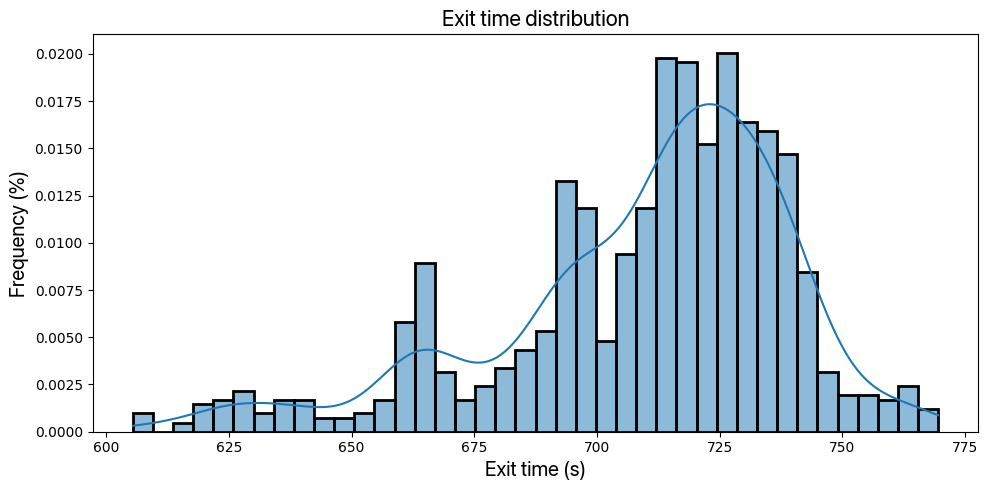

In [31]:
# Plot distribution of exit times

fig, ax = plt.subplots(figsize=(10, 5))

sns.histplot(exit_times, ax=ax, bins=40, kde=True, stat='density', linewidth=2)

ax.set_xlabel('Exit time (s)', font="SF Pro Display", fontsize=15)
ax.set_ylabel('Frequency (%)', font="SF Pro Display", fontsize=15)

ax.set_title(f'Exit time distribution', font="SF Pro Display", fontsize=16)

fig.tight_layout()

# Transparent background
fig.patch.set_alpha(0)

fig.savefig(f"plots/{sim_type}/exit_time_distribution.png", dpi=300, transparent=True)

In [32]:
len(exit_times)

1010

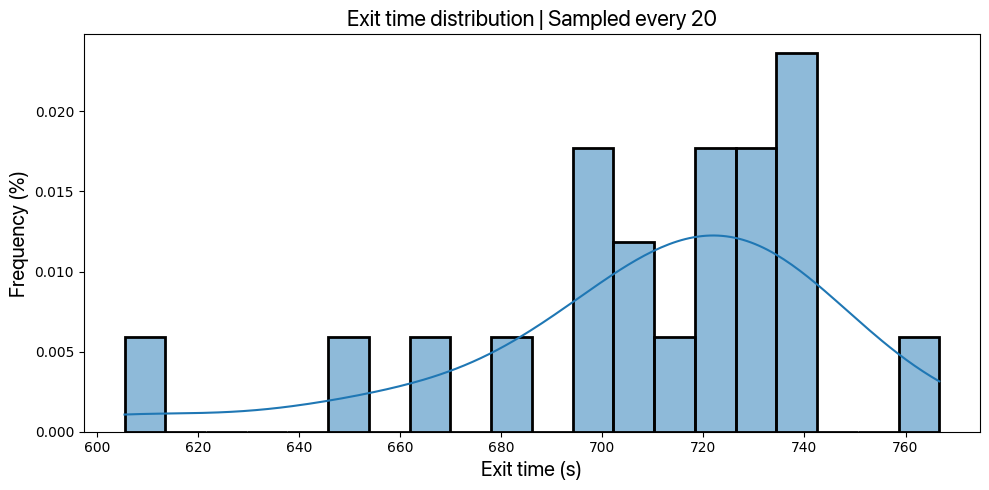

In [33]:
# Sample exit times every 50 
sampled_exit_times = exit_times[::50]

# Plot distribution of exit times

fig, ax = plt.subplots(figsize=(10, 5))

sns.histplot(sampled_exit_times, ax=ax, bins=20, kde=True, stat='density', linewidth=2)

ax.set_xlabel('Exit time (s)', font="SF Pro Display", fontsize=15)
ax.set_ylabel('Frequency (%)', font="SF Pro Display", fontsize=15)

ax.set_title(f'Exit time distribution | Sampled every 20', font="SF Pro Display", fontsize=16)

fig.tight_layout()

# Transparent background
fig.patch.set_alpha(0)

fig.savefig(f"plots/{sim_type}/exit_time_distribution_sampled_20.png", dpi=300, transparent=True)

In [34]:
print(exit_times.mean(), max(exit_times), min(exit_times), np.std(exit_times), np.var(exit_times))
print(sampled_exit_times.mean(), max(sampled_exit_times), min(sampled_exit_times), np.std(sampled_exit_times), np.var(sampled_exit_times))

709.5470792079208 769.5 605.43 29.968167545304286 898.0910660234291
709.5309523809523 766.67 605.43 35.27121312463532 1244.0584752834468


In [35]:
crashes_df

,frame,car_id,car_x,car_v,car_a,car_t_d,f_car_id,b_car_id
0,221671.0,973104.0,109.511173,11.661550,-3.143798,5.72,247477.0,63226.0
1,221671.0,247477.0,114.583789,5.242962,2.288918,14.72,929346.0,973104.0
2,409673.0,111053.0,103.442200,10.087948,-3.251603,5.74,439079.0,773796.0
3,409674.0,439079.0,107.506760,4.373819,-3.801495,14.75,900706.0,111053.0
4,417220.0,773796.0,559.080691,11.841927,-3.868895,77.21,900706.0,250189.0
5,417222.0,900706.0,564.577290,8.268107,1.652162,96.23,309892.0,773796.0
6,526051.0,973206.0,159.388520,8.927029,-2.410332,9.52,56563.0,122357.0
7,526052.0,56563.0,163.794006,5.121680,-4.546831,15.53,651859.0,973206.0
